::: {.hidden}
$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vz}{\mathbf{z}}
\newcommand{\mX}{\mathbf{X}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\bracket}[1]{\langle #1 \rangle}
\newcommand{\paren}[1]{\left( #1 \right)}
\newcommand{\one}[1]{\mathbb{1}\left[ #1 \right]}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\mA}{\mathbf{A}}
\newcommand{\vtheta}{\boldsymbol{\theta}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\prob}[1]{\mathbb{P}\left[#1\right]}
\newcommand{\E}{\mathbb{E}}

\usepackage{amsmath}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
$$

:::

## Quick Recap

Last time, we studied the perceptron algorithm for binary classification using hyperplanes. In doing so, we introduced the *loss* of a hyperplane, which we defined as the number of misclassifications made by the classifier based on that hyperplane. 

We also saw that the perceptron has some major challenges associated with it. In this lecture, we're going to extend the idea of *loss* to cover a broader range of models. Within this theory, we'll be able to understand where some of the perceptron's problems come from, and what to do about them. 

Recall that our setup for the perceptron was as follows. We have *data*, a pair $(\mX, \vy)$ where 

- $\mX \in \R^{n\times p}$ is the *feature matrix*. There are $n$ distinct observations, encoded as rows. Each of the $p$ columns corresponds to a *feature*: something about each observation that we can measure or infer. Each observation is written $\vx_1, \vx_2,\ldots$. 
$$
\mX = \left[\begin{matrix} & - & \vx_1 & - \\ 
& - & \vx_2 & - \\ 
& \vdots & \vdots & \vdots \\ 
& - & \vx_{n} & - \end{matrix}\right]
$$
- $\vy \in \R^{n}$ is the *target vector*. The target vector gives a label, value, or outcome for each observation. 

In the perceptron, we assumed that $\vy \in \{-1, 1\}^n$. We also assumed that we are going to try to *linearly* classify the points by finding a pair $(\vw, b)$ that define a *hyperplane*. This is the set of points $\vx \in \R^n$ that satisfy the equation 
$$
\bracket{\vw, \vx} - b = 0\;.
$$

We saw that if we redefined $\tilde{\vx} = (\vx, 1)$ and $\tilde{\vw} = (\vw, -b)$, we could simply write this as 
$$
\bracket{\tilde{\vw}, \tilde{\vx}} = 0\;
$$

instead. For the remainder of these notes, we'll simply write our feature vectors as $\vx$ and our parameter vector as $\vw$, assuming that the final entry of $\vx$ is also a 1. 

- For a given point $\vx$, we can make a *prediction* $\hat{y} = \bracket{\vw, \vx}$. 
- We decide that a prediction is *accurate* (and give ourself one "point") if $\hat{y}$ has the same sign as $y$. This can be expressed in either of the following equivalent ways: 
    - $\one{\mathrm{sign}(\hat{y}) = y}$
    - $\one{\hat{y}y > 0}$
- The *overall accuracy* or *score* is the accuracy rate averaged across the entire data set. We also defined the overall *loss* to be one minus the accuracy: 
$$
\begin{aligned}
A(\vw) &= \frac{1}{n}\sum_{i = 1}^n \one{\hat{y}_iy_i > 0}\\ 
          &= \frac{1}{n}\sum_{i = 1}^n \one{(\bracket{\vw, \vx_i})y_i > 0} \\ 
L(\vw) &= 1 - A(\vw) \\ 
          &= \frac{1}{n}\sum_{i = 1}^n \left(1 - \one{\hat{y}_iy_i > 0}\right) \\ 
          &= \frac{1}{n}\sum_{i = 1}^n \left(1- \one{(\bracket{\vw, \vx_i})y_i > 0}\right)\;.
\end{aligned}
$$

We'd like to find $\vw$ to *minimize* the loss function. That is, we'd like to solve the problem 

$$
\hat{\vw} = \argmin_{\vw} \; L(\vw)
$${#eq-empirical-risk-perceptron}

The loss is also often called the *empirical risk*, and this minimization problem is often called *empirical risk minimization*, for reasons that we'll discuss in a coming lecture. The perceptron algorithm was one way to attack the empirical risk minimization problem.

## Some Questions For Empirical Risk Minimization

It is at this point that we need to ask some important questions with awkward answers. 

1. **Existence**: Does @eq-empirical-risk-perceptron have *any* solutions? 
2. **Uniqueness**: Assuming there exists a solution to @eq-empirical-risk-perceptron, is it unique? Or are there many different solutions? 
3. **Searchability**: Is it possible to write algorithms are guaranteed to find a solution of @eq-empirical-risk-perceptron? 
4. **Performance**: Is it possible to make these algorithms *fast*?  

In most prediction problems, what we'd really like is to be *right* about the true value of $y$. In the context of linear classifiers, this means that we want all the points of one label to be on one side of the line, and all the points of the other label to be on the other side. The loss function that expresses this idea is the 0-1 loss function, which is, again, the loss function used in the perceptron algorithm: 
$$
\ell(\hat{y}, y) = 1 - \one{\hat{y}y > 0}\;.
$$
When we graph the 0-1 loss function, it looks like this. I've shown versions corresponding to both values of the true label, $y = 1$ and $y = -1$. 

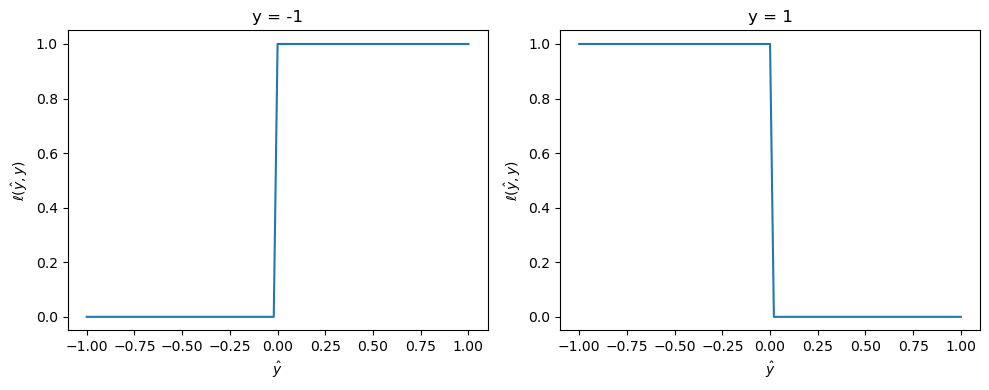

In [3]:
from matplotlib import pyplot as plt 
import numpy as np

plt.rcParams["figure.figsize"] = (10, 4)

fig, axarr = plt.subplots(1, 2) 
y_hat = np.linspace(-1, 1, 101)

loss = lambda y_hat, y: 1 - 1*(y_hat*y > 0)

for j in range(2):
    y = [-1, 1][j]
    axarr[j].set_title(f"y = {y}")
    axarr[j].set(xlabel = r"$\hat{y}$", 
                 ylabel = r"$\ell(\hat{y}, y)$")
    
    axarr[j].plot(y_hat, loss(y_hat, y))

plt.tight_layout()

Let's now ask our four questions about empirical risk minimization for the 0-1 loss function. 

**Existence**: Does @eq-empirical-risk-perceptron have *any* solutions? 

- We are good on this one! Specifically, the risk can take on only a finite number of possible values (values between 0 and 1 in increments of $1/n$). In any given problem there is a smallest such value obtained, and this is a solution. 

**Uniqueness**: Assuming there exists a solution to @eq-empirical-risk-perceptron, is it unique? Or are there many different solutions? 

[To define "usually" and "just a little bit" rigorously, we need to specify a data generating distribution and do some math.]{.aside}

- Unfortunately, the solution to @eq-empirical-risk-perceptron for the 0-1 loss is almost never unique. This is because, if you have one solution $\vw$, you can "usually" jiggle it by "just a little bit" and still have a minimizing solution. 

**Searchability**: Is it possible to write algorithms are guaranteed to find a solution of @eq-empirical-risk-perceptron? 

Technically, we could just try a very large number of choices of $\vw$ and hope for the best, but that's not very efficient (in fact, the problem of getting a reasonable answer this way is exponential in $d$, the number of features). Can we do better? 

**Performance**: Is it possible to make these algorithms *fast*?  

This is where our real problem lies: 

::: {.callout-tip} 

::: {#thm-perceptron-np-hard}

## 0-1 Minimization for Linear Classifiers is NP Hard (@kearns1994toward)

Unless P = NP, there is no polynomial-time algorithm that can solve the 0-1 empirical risk minimization problem for linear classifiers. 

:::
:::

So, if we are going to have reasonable algorithms for empirical risk minimization, *we need to choose a different loss function*. There are multiple choices. Before we jump into examples, we're going to define the core mathematical concept that is going to help address our core questions of existence, uniqueness, searchability, and performance. 

## Convexity

::: {.callout-note}
::: {#def-convex-set} 

A set $S \subseteq \R^n$ is *convex* if, for any two points $\vz_1, \vz_2 \in S$ and for any $\lambda \in [0,1]$, the point $\vz = \lambda \vz_1 + (1-\lambda) \vz_2$ is also an element of $S$. 

::: 
:::


::: {.callout-note}
::: {#def-convex-function} 

## Convex Functions

Let $S \subseteq \R^n$ be convex. A function $f:S \rightarrow \R$ is *convex* if, for any $\lambda \in \R$ and any two points $\vz_1, \vz_2 \in S$, we have 

$$
f(\lambda \vz_1 + (1-\lambda)\vz_2) \leq \lambda f( \vz_1 ) + (1-\lambda)f(\vz_2)\;.
$$

The function $f$ is *strictly convex* if the inequality is strict: for all $\lambda$, $\vz_1$, and $\vz_2$, 

$$
f(\lambda \vz_1 + (1-\lambda)\vz_2) < \lambda f( \vz_1 ) + (1-\lambda)f(\vz_2)\;.
$$

:::
:::

Roughly, a convex function is "bowl-shaped." 

::: {.callout-note} 
::: {#def-minima} 

## Local and Global Minima
 
A point $\vz\in S$ is a *global minimum* of the function $f:S \rightarrow \R$ if $f(\vz) \leq f(\vz')$ for all $\vz' \in S$. 

A point $\vz \in S$ is a *local minimum* of $f:S \rightarrow \R$ if there exists a neighborhood $T \subseteq S$ containing $\vz$ such that $\vz$ is a global minimum of $f$ on $T$. 

:::
:::




[It's ok if you don't know what it means for a set to be closed -- all the convex functions we will care about in this class will either be defined on sets where this theorem holds or will be otherwise defined so that the conclusions apply. 
]{.aside}

::: {.callout-note} 
::: {#thm-convex-functions-are-nice}

Let $f:S \rightarrow \R$ be a convex function. Then: 

1. If $S$ is closed and bounded, $f$ achieves a minimum $\vz^*$ on $S$. 
2. Furthermore, if $\vz^*$ is a *local* minimum of $f$, then it is also a global minimum. 
2. If in addition $f$ is *strictly* convex, then this minimum is unique. 

:::
::: 

::: {.proof} 
The proof of item 1 needs some tools from real analysis. The short version is: 

- Every convex function is *continuous*. 
- If $S\subseteq \R^n$ is closed and bounded, then it is *compact*. 
- Continuous functions achieve minima and maxima on compact sets. 

It's ok if you didn't follow this! Fortunately the second part of the proof is one we can do together. Suppose to contradiction that $\vz^*$ is a local minimum of $f$, but that there is also a point $\vz'$ such that $f(\vz') < f(\vz^*)$. Since $\vz^*$ is a local minimum, we can find some neighborhood $T$ containing $\vz^*$ such that $\vz^*$ is a minimum of $f$ on $T$. Let $\lambda$ be some very small number and consider the point $\vz = \lambda \vz' + (1-\lambda)\vz^*$. Specifically, choose $\lambda$ small enough so that $\vz \in T$ (since this makes $\vz$ close to $\vz^*$). We can evaluate 

$$
\begin{align}
f(\vz) &= f(\lambda \vz' + (1-\lambda)\vz^*) \tag{definition of $\vz$}\\ 
       &\leq \lambda f(\vz') + (1-\lambda)f(\vz^*)  \tag{$f$ is convex} \\ 
       &= f(\vz^*) + \lambda (f(\vz') - f(\vz^*)) \tag{algebra}\\ 
       &< f(\vz^*)\;. \tag{assumption that $f(\vz') < f(\vz^*)$}
\end{align}
$$

But this is a contradiction, since we constructed $\vz$ to be in the neighborhood $T$ where $\vz^*$ is a local minimum. We conclude that there is no  $\vz'$ such that $f(\vz') < f(\vz^*)$, and therefore that $\vz^*$ is a global minimum. 

The proof of the third part follows a very similar argument to the proof of the second part! 
:::

There's two other very important math facts that we need in order to apply convexity to the empirical risk minimization problem for linear models. 

[By induction, it follows that any linear combination of convex functions with positive coefficients is convex.]{.aside}

::: {.callout-note}

::: {#thm-convex-compositions} 

1. Let $f_1$ and $f_2$ be convex functions with the same domain, and let $a$ and $b$ be nonnegative real numbers. Then, the function $f$ defined by $f(\vz) = af_1(\vz) + bf_2(\vz)$ is also convex. 
2. Let $f:\R^n\rightarrow \R$ be convex. Let $\mA \in \R^{n\times p}$ and $\mathbf{b} \in \R^n$. Then, the function $f_\mA$ defined by $f_{\mA,\mathbf{b}}(\vz) = f(\mA\vz - \mathbf{b})$ is convex.   
:::
:::

## Convexity and Empirical Risk Minimization 

Let's finally go back to the empirical risk minimization problem for linear models. We're going to write it in terms of a general loss function $\ell$; the choice $\ell(\hat{y}, y) = 1 - \one{\hat{y}y > 0}$ gets us back to the 0-1 loss situation. The general empirical risk minimization problem for linear classifiers is

$$
\hat{\vw} = \argmin_{\vw} \frac{1}{n} \sum_{i = 1}^n \ell(\bracket{\vw, \vx_i}, y_i)\;.
$$ {#eq-empirical-risk-linear-general}

Let's now assume that the loss function $\ell$ is strictly convex in its first argument: that is, for any possible value of $y$ and any $\lambda \in [0,1]$, 
$$
\ell(\lambda \hat{y}_1 + (1-\lambda)\hat{y}, y) \leq  \lambda \ell(\hat{y}_1, y) + (1-\lambda)\ell(\hat{y}, y)\;. 
$$
Then, suddenly the following things would all also be true: 

1. $\ell(\bracket{\vw, \vx}, y)$ is strictly convex as a function of $\vw$ (@thm-convex-compositions, part 2). 
2. The empirical risk $L(\vw) = \frac{1}{n}\sum_{i = 1}^n \ell(\bracket{\vw, \vx_i}, y_i)$ is strictly convex as a function of $\vw$ (@thm-convex-compositions, part 1). 
3. If the empirical risk $R(\vw)$ has a global minimum, that global minimum is unique (@thm-convex-functions-are-nice, part 3). 
4. The empirical risk $R(\vw)$ has no local minima which are not global minima. 

These facts have important implications for our fundamental questions on empirical risk minimization. 

**Existence**. Even convex functions are not guaranteed to have minima. However, there are lots of choices of loss function $\ell$ which do guarantee that the empirical risk has a minimizer. 

**Uniqueness**: When the empirical risk is strictly convex, there can only be one global minimizer. 

**Searchability**: When the empirical risk is strictly convex, there are also no local minima other than the global minimum. Algorithmically, ***this is the most important property of convexity***. It means that if I manage to find any local minimum at all, that point *must* be the global minimum. 

[If you've taken an algorithms class, one way of thinking of convexity is that it guarantees that *greedy methods work* for solving minimization problems.]{.aside}
**Performance**: Convexity significantly reduces the difficulty of our task: instead of trying to find "the best" solution, it's sufficient for us to find any local optimum. This means that we can design our algorithms to be "greedy local minimum hunters." There are lots of fast algorithms to do this. An especially important class of algorithms are *gradient descent methods*, which we'll discuss soon. 




## Demo: Logistic Regression

Let's do a partial implementation of logistic regression to illustrate these techniques. In logistic regression, we assume that $y \in \{0,1\}$. Our loss function is the *logistic loss*: 

$$
\ell(\hat{y}, y) = -y \log \sigma(\hat{y}) - (1-y)\log (1-\sigma(\hat{y}))\;,
$$

where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the *logistic sigmoid* function. 

*The logistic loss is convex in* $\hat{y}$, although proving this requires a little bit of extra math that we won't discuss. Here's a "proof by picture" for the case when the label is $y = 1$. 

In [4]:
#| echo: false

plt.rcParams["figure.figsize"] = (4, 3)

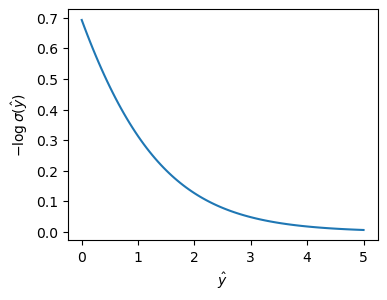

In [5]:
z = np.linspace(0, 5, 101)
plt.plot(z, -np.log(1/(1 + np.exp(-z)))) 
labs = plt.gca().set(xlabel = r"$\hat{y}$", ylabel = r"$-\log \sigma(\hat{y})$")

Because the logistic loss is convex in $\hat{y}$, the empirical risk minimization problem can have at most one minimum. In fact, it's possible to show, if the data is *not* linearly separable, there exists a global minimum. 

Here is some sample data for which we will try to find a good linear classifier. 

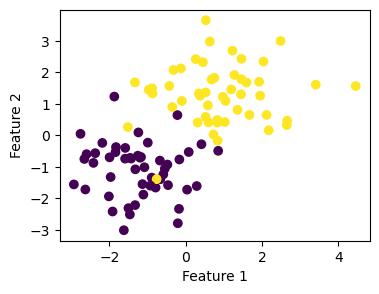

In [6]:
#| fig-cap: Note that this data is **not** linearly separable. The perceptron algorithm wouldn't even have converged for this data set, but logistic regression will do great. 

from sklearn.datasets import make_blobs

p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Now let's do an implementation. First let's define a linear predictor function of the form $f(\vx) = \bracket{w, \vx}$. Note that this predictor makes the predictions on *all* the training data at once! 

In [15]:
#| code-fold: false
import numpy as np 
from scipy.optimize import minimize

# logistic regression tends to involve a lot of log(0) and things that wash out in the end. 
np.seterr(all='ignore') 

# add a constant feature to the feature matrix
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)

def predict(X, w):
    return X@w

Now we'll define some functions to compute the empirical risk: 

In [16]:
#| code-fold: false

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# returns a vector containing the per-observation logistic loss for each observation
def logistic_loss(y_hat, y): 
    return -y*np.log(sigmoid(y_hat)) - (1-y)*np.log(1-sigmoid(y_hat))

# first compute the predictions, then compute the average loss per observation
# note that this works on the ENTIRE DATA SET AT ONCE: no for-loops
def empirical_risk(X, y, w, loss):
    y_hat = predict(X, w)
    return loss(y_hat, y).mean()

Finally, we can write the function that will solve the empirical risk minimization problem for us. We're going to use the `scipy.optimize.minimize` function, which is a built-in function for solving minimization problems. Soon, we'll study how to solve minimization problems from scratch. 

The `scipy.optimize.minimize` function requires us to pass it a single function that accepts a vector of parameters, plus an initial guess for the parameters. 

In [17]:
#| code-fold: false
def find_pars(X, y):
    
    p = X.shape[1]
    x0 = np.random.rand(p) # random initial guess
    
    # perform the minimization
    result = minimize(lambda x: empirical_risk(X, y, w, logistic_loss), 
                      x0 = x0) 
    
    # return the parameters
    return result.x

Ok, let's try it and take a look at the parameters we obtained. Because the final column of `X_` is the constant column of 1s, the final entry of `w` is interpretable as the intercept term `b`. 

In [18]:
#| code-fold: false

w = find_pars(X_, y)
w

array([1.55195385, 2.50106699, 0.12882553])

And, finally, we can plot the linear classifier that we learned. 

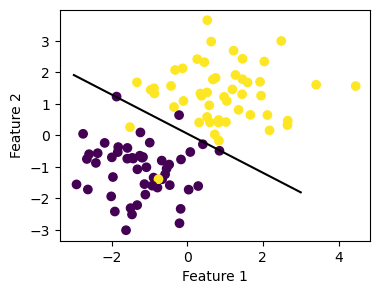

In [19]:
#| code-fold: false

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")

Since the logistic loss is convex, we are guaranteed that this solution is the unique best solution (as measured by the logistic loss). There is no other possible set of parameters that would lead to a better result (again, as measured by the logistic loss). 